In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  collections import Counter

In [2]:
df=pd.read_excel(r'C:\Users\HP\Downloads\Superstore File Final.xlsx')

df.head()

,Unnamed: 0,Order_Id,Order_Date,Order_Year,Year_Quarter,Order_Month,Order_Week,Order_Day,Ship_Date,Ship_Mode,...,Sub_Category,Product_Name,Returned,Staff_Name,Sales,Quantity,Discount,Profit,Cost per Unit,Days_To_Ship
0,NaN,CA-2016-152156,2016-11-08,2016,Q4,Nov,46,Tuesday,2016-11-11,Second Class,...,Bookcases,Bush Somerset Collection Bookcase,0,Cassandra Brandow,261.960,2,0.00,41.91,110.03,3
1,NaN,CA-2016-152156,2016-11-08,2016,Q4,Nov,46,Tuesday,2016-11-11,Second Class,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0,Cassandra Brandow,731.940,3,0.00,219.58,170.79,3
2,NaN,CA-2016-138688,2016-06-12,2016,Q2,Jun,25,Sunday,2016-06-16,Second Class,...,Labels,Self-Adhesive Address Labels for Typewriters b...,0,Anna Andreadi,14.620,2,0.00,6.87,3.88,4
3,NaN,US-2015-108966,2015-10-11,2015,Q4,Oct,42,Sunday,2015-10-18,Standard Class,...,Tables,Bretford CR4500 Series Slim Rectangular Table,0,Cassandra Brandow,957.578,5,0.45,-383.03,268.12,7
4,NaN,US-2015-108966,2015-10-11,2015,Q4,Oct,42,Sunday,2015-10-18,Standard Class,...,Storage,Eldon Fold 'N Roll Cart System,0,Cassandra Brandow,22.368,2,0.20,2.52,9.92,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     0 non-null      float64
 1   Order_Id       2000 non-null   object 
 2   Order_Date     2000 non-null   object 
 3   Order_Year     2000 non-null   int64  
 4   Year_Quarter   2000 non-null   object 
 5   Order_Month    2000 non-null   object 
 6   Order_Week     2000 non-null   int64  
 7   Order_Day      2000 non-null   object 
 8   Ship_Date      2000 non-null   object 
 9   Ship_Mode      2000 non-null   object 
 10  Customer_Id    2000 non-null   object 
 11  Customer_Name  2000 non-null   object 
 12  Segment        2000 non-null   object 
 13  Country        2000 non-null   object 
 14  City           2000 non-null   object 
 15  State          2000 non-null   object 
 16  Postal_Code    2000 non-null   int64  
 17  Region         2000 non-null   object 
 18  Product_

In [6]:
dframe=df.loc[:,['Order_Date','Sales']]

In [7]:
dframe

,Order_Date,Sales
0,2016-11-08,261.960
1,2016-11-08,731.940
2,2016-06-12,14.620
3,2015-10-11,957.578
4,2015-10-11,22.368
...,...,...
1995,2017-12-02,294.620
1996,2017-12-02,8.752
1997,2014-02-06,15.000
1998,2014-02-06,161.610


In [10]:
dframe=dframe.set_index('Order_Date')

In [11]:
dframe

,Sales
Order_Date,
2016-11-08,261.960
2016-11-08,731.940
2016-06-12,14.620
2015-10-11,957.578
2015-10-11,22.368
...,...
2017-12-02,294.620
2017-12-02,8.752
2014-02-06,15.000


<AxesSubplot:xlabel='Order_Date'>

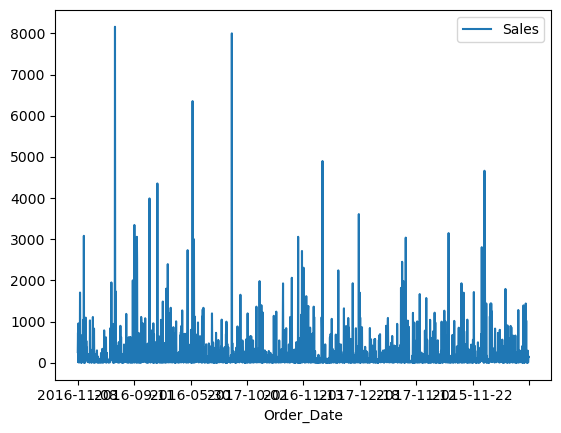

In [12]:
dframe.plot()

<AxesSubplot:xlabel='Order_Date'>

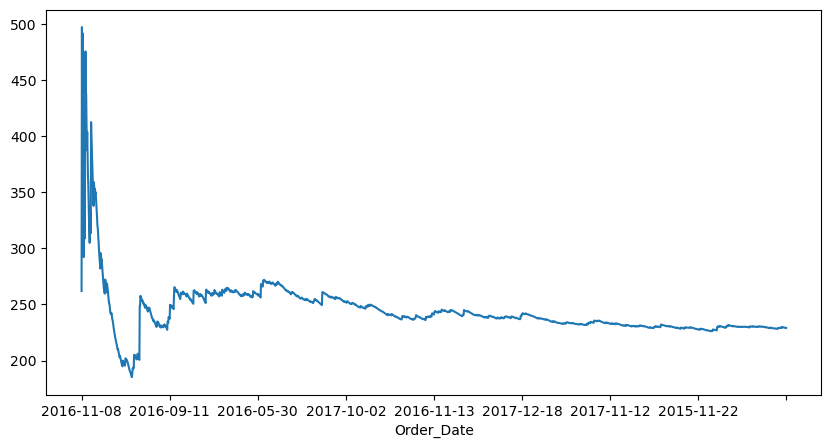

In [15]:
dframe['Sales'].expanding(min_periods=1).mean().plot(figsize=(10,5))

In [17]:
dframe.index

Index(['2016-11-08', '2016-11-08', '2016-06-12', '2015-10-11', '2015-10-11',
       '2014-06-09', '2014-06-09', '2014-06-09', '2014-06-09', '2014-06-09',
       ...
       '2015-11-09', '2017-02-24', '2017-06-25', '2017-06-25', '2017-06-25',
       '2017-12-02', '2017-12-02', '2014-02-06', '2014-02-06', '2014-02-06'],
      dtype='object', name='Order_Date', length=2000)

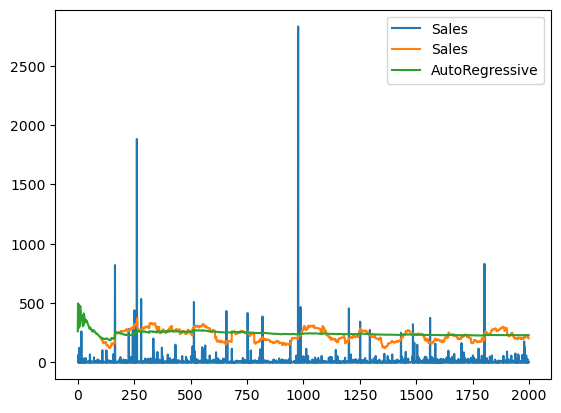

In [22]:
df['Sales'].pct_change(1).plot()
df['Sales'].rolling(window=100).mean().plot()
df['Sales'].expanding(min_periods=1).mean().plot(label='AutoRegressive')
plt.legend()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf

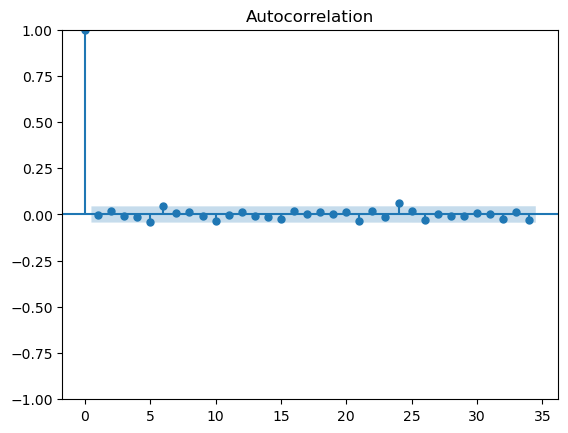

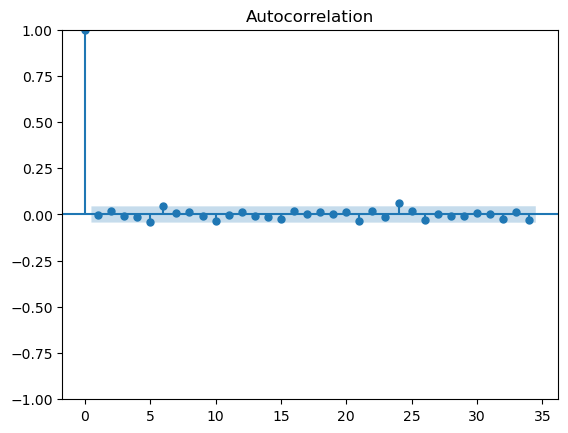

In [24]:
plot_acf(dframe['Sales'])

In [35]:
from statsmodels.tsa.stattools import adfuller

In [37]:
model=adfuller(df['Sales'])

In [40]:
def hypothesising_checkig(X):
    model=adfuller(X)
    print('Augmented Dickey Fuller test')
    labels=['ADF test Statistics','P_value','#Lags_used','#no_of Observation_used']
    for i,label in zip(model,labels):
        print(label+':'+str(i))
    if model[1]<0.05:
        print('Reject The Null Hypothesis, that is Stationary is Present')
    else:
        print('We Accept the Null Hypothesis, that is it indicating Non-Stationary')

In [41]:
hypothesising_checkig(dframe['Sales'])

Augmented Dickey Fuller test
ADF test Statistics:-44.77570613437909
P_value:0.0
#Lags_used:0
#no_of Observation_used:1999
Reject The Null Hypothesis, that is Stationary is Present


it has been confirm that the Sales column is Stationary

<AxesSubplot:>

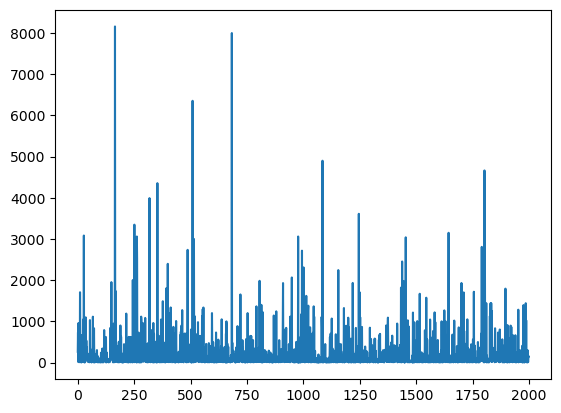

In [43]:
df['Sales'].plot()

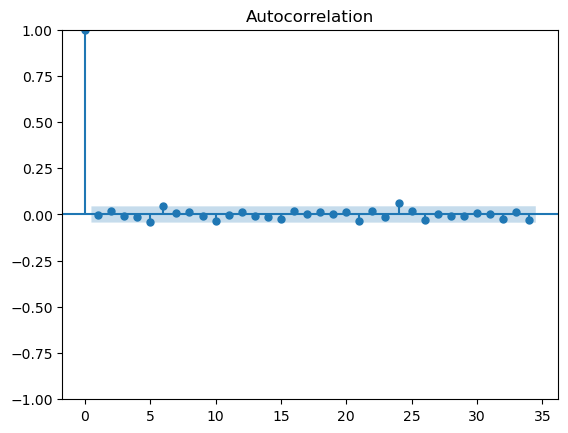

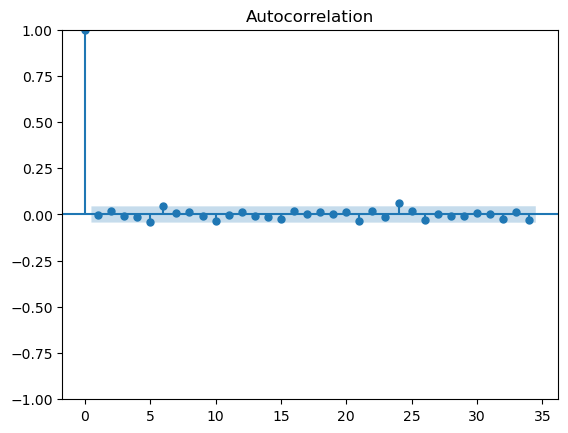

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [46]:
model=SARIMAX(dframe['Sales'],order=(1,2,1),seasonal_order=(1,1,1,12))
result=model.fit()
print(result.summary())

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 2000
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood              -15675.135
Date:                            Sun, 16 Jul 2023   AIC                          31360.270
Time:                                    20:38:00   BIC                          31388.239
Sample:                                         0   HQIC                         31370.543
                                           - 2000                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5110      0.006    -85.699      0.000      -0.523      -0.499
ma.L1         -1.0000      1.006   